<a href="https://colab.research.google.com/github/cris-her/AI/blob/master/linear_regression_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Esta linea permite que los graficos sean renderizados directamente en nuestro Notebook
## Carguemos en un pandas dataframe nuestra base de datos
%matplotlib inline

## Carguemos en un pandas dataframe nuestra base de datos

<div class="alert alert-block alert-info" style="margin-top: 20px">
  <code>pd.read_csv</code> es el metodo que nos permite importar los datos desde un CSV y cargarlo en un **DataFrame**, que es la estructura de base de Pandas
</div>

In [3]:
movies = pd.read_csv('https://raw.githubusercontent.com/cris-her/datasets-platzi-course/master/datasets/peliculas.csv',encoding='utf-8')

In [4]:
type(movies)

pandas.core.frame.DataFrame

In [5]:
movies.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [6]:
# Cuantas lineas y columnas tiene nuestro dataframe
### Un dataframe es una estructura de datos que se compone de los elementos siguientes
movies.shape

(5043, 19)

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Un dataframe es una estructura de datos que se compone de los elementos siguientes
</div> 

<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/dataframe_structure.png" style="margin:0 auto;clear:both">






In [7]:
#visualizemos las columnas
movies.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [8]:
movies.index

RangeIndex(start=0, stop=5043, step=1)

In [9]:
columna1 = movies['movie_title']
columna1.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [10]:
linea = movies.loc[10,:]
linea

movie_title                                Batman v Superman: Dawn of Justice 
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
duration.1                                                                 183
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                        

In [11]:
movies.loc[:,'movie_title'].head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

## Intentemos inspeccionar nuestros datos y entenderlos mejor 

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

<div class="alert alert-block alert-info" style="margin-top: 20px">
  A diferencia de Numpy, Pandas permite cargar no solo datos numericos pero tambien **datos de texto** que vemos por ejemplo en las columnas de actores y **mezclar distintos tipos de datos**.
<ul>
 <li>int64 y float64 corresponden a los mismos dtypes de Numpy </li>
 <li> object es el dtype que permite manejar datos de texto </li>
</ul>
</div>

In [13]:
# columnas númericas y columnas de texto
movies.dtypes == float

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes    False
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [14]:
movies.dtypes == int

movie_title                  False
title_year                   False
color                        False
aspect_ratio                 False
duration                     False
language                     False
country                      False
duration.1                   False
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [15]:
movies.dtypes == object

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [16]:
num = (movies.dtypes == float) | (movies.dtypes == int)
num

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [17]:
num.index

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [18]:
for el in num.index:
    print(el)

movie_title
title_year
color
aspect_ratio
duration
language
country
duration.1
genres
content_rating
plot_keywords
director_name
actor_1_name
actor_2_name
actor_3_name
cast_total_facebook_likes
budget
imdb_score
gross


In [19]:
num_cols = [c for c in num.index if num[c]]

In [20]:
num_cols

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [21]:
movies.dtypes == object

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [22]:
obj = (movies.dtypes == object)
obj_cols = [c for c in obj.index if obj[c]]

In [23]:
obj_cols

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

In [24]:
num_cols

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [25]:
movies_num = movies[num_cols]

In [26]:
# Estadísticas de las columnas númericas
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


In [27]:
# Estadísticas de las columnas de texto

Para hacer nuestro primer modelo más simple para este trabajaremos solo con las columnas númericas.

<AxesSubplot:>

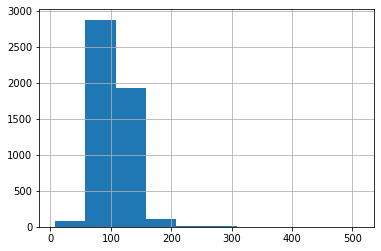

In [28]:
movies_num['duration'].hist()

<AxesSubplot:>

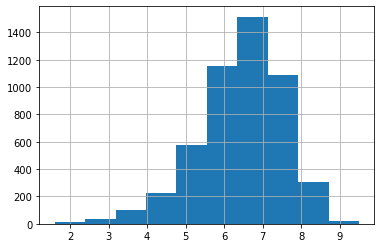

In [29]:
movies_num['imdb_score'].hist()

<AxesSubplot:>

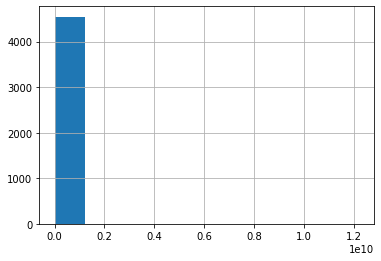

In [30]:
movies_num['budget'].hist()

<div class="alert alert-block alert-info" style="margin-top: 20px">
Para poder debuggear esta situación utilizaremos una tecnica muy tipica de pandas que se llama **boolean filtering**. Basicamente construimos una serie de booleanos con el mismo indice que nuestro dataframe (la serie clasicamente la llamaremos mask).
</div>

In [31]:
mask = (movies_num['budget'] > 1e9)

In [32]:
movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/akira.png" width="1000" style="margin:0 auto;clear:both">

 Tenemos un problema de limpieza de los datos. La BDD fue creada sin diferenciar:
- La moneda en la que se ingresaba el presupuesto y el ingreso. 
- La zona (país/mundial) en la que se registro el ingreso

In [33]:
# Importar BBDD thenumbers.com## Ahora manejaremos los datos faltantes (nulos o NaN). 

In [34]:
pd.read_csv('https://raw.githubusercontent.com/cris-her/datasets-platzi-course/master/datasets/thenumbers.csv')

,Unnamed: 0,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End
3,3,Spectre,200074175,http://www.the-numbers.com/movie/Spectre#tab=s...,300000000,11/6/2015,879620923,Spectre
4,4,The Dark Knight Rises,448139099,http://www.the-numbers.com/movie/Dark-Knight-R...,275000000,7/20/2012,1084439099,The Dark Knight Rises
...,...,...,...,...,...,...,...,...
4336,5157,The Mongol King,900,http://www.the-numbers.com/movie/Mongol-King-T...,7000,1/1/2004,900,The Mongol King
4337,5160,Signed Sealed Delivered,0,http://www.the-numbers.com/movie/Signed-Sealed...,5000,9/29/2015,0,Signed Sealed Delivered
4338,5161,Shanghai Calling,10443,http://www.the-numbers.com/movie/Shanghai-Call...,3967,2/15/2013,10443,Shanghai Calling
4339,5162,A Plague So Pleasant,0,http://www.the-numbers.com/movie/Plague-So-Ple...,1400,9/29/2015,0,A Plague So Pleasant


In [35]:
financials = pd.read_csv('https://raw.githubusercontent.com/cris-her/datasets-platzi-course/master/datasets/thenumbers.csv')

In [36]:
financials = financials[['movie_title','production_budget','worldwide_gross']]

In [37]:
#gross_opening = pd.read_csv('https://raw.githubusercontent.com/cris-her/datasets-platzi-course/master/datasets/opening_df.csv')

In [38]:
financials.shape

(4341, 3)

In [39]:
movies.shape

(5043, 19)

In [40]:
movies['movie_title']

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [41]:
movies_num

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
...,...,...,...,...,...,...,...,...
5038,2013.0,NaN,87.0,87.0,2283,NaN,7.7,NaN
5039,NaN,16.00,43.0,43.0,1753,NaN,7.5,NaN
5040,2013.0,NaN,76.0,76.0,0,1400.0,6.3,NaN
5041,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0


In [42]:
movies_num = pd.concat([movies_num, movies['movie_title']],axis=1)

In [43]:
#gross_opening = gross_opening.drop('Unnamed: 0',axis=1)

In [44]:
movies_v2 = pd.merge(financials,movies_num,on='movie_title',how='left')

In [45]:
#movies_v2 = pd.merge(movies_v2,gross_opening,on='movie_title',how='left')

In [46]:
movies_v2.shape

(4385, 11)

## Ahora solucionaremos el problema de los datos faltantes (nulos o NaN). 

<div class="alert alert-success">
  Los datos faltantes generan problemas con muchos algoritmos de ML. Es por esto que existen distintas estrategias para lidiar con ellos.
</div>

In [47]:
help(pd.Series.value_counts)

Help on function value_counts in module pandas.core.base:

value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include counts of NaN.
    
    Returns
    -------
    Series
    
    See Also
    --------
    Series.count: Number 

In [48]:
movies_v2.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


In [49]:
(movies_v2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [50]:
available = ((movies_v2 != 0) & (movies_v2.notnull()))

In [51]:
available.all(axis=1).value_counts()

True     3408
False     977
dtype: int64

No podemos entrenar nuestro algoritmo con datos cuya variable objetivo no esta definida o sea nula (valor falso). Eliminemos esas líneas.

In [52]:
mask = available['worldwide_gross']

In [53]:
movies_v2 = movies_v2[mask]

In [54]:
((movies_v2 != 0) & (movies_v2.notnull())).worldwide_gross.value_counts()

True    4104
Name: worldwide_gross, dtype: int64

<div class="alert alert-success">
  En el caso de las features que no son la variable objetivo una mejor solución para lidiar con los datos faltantes es <strong>remplazar estos datos por otros que sean manejables</strong> y no afecten la calidad de las predicciones. La estrategia más comun es utilizar la media de todos los ejemplos para la feature dada.
</div>

In [55]:
movies_v2 = movies_v2.drop('movie_title',axis=1)

In [56]:
movies_v2 = movies_v2.drop('duration',axis=1)

In [57]:
movies_v2 = movies_v2.drop('gross',axis=1)

In [58]:
movies_v2.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5


In [59]:
#movies_v2 = movies_v2[available.screens]

In [60]:
#len(movies_v2)

In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [62]:
values = imputer.fit_transform(movies_v2)
X = pd.DataFrame(values)
X.columns = movies_v2.columns
X.index = movies_v2.index
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5


In [63]:
len(X)

4104

In [64]:
movies_v2.values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        4.83400000e+03, 2.37000000e+08, 7.90000000e+00],
       [3.06000000e+08, 2.05866222e+09,            nan, ...,
        1.43000000e+02,            nan, 7.10000000e+00],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        4.83500000e+04, 3.00000000e+08, 7.10000000e+00],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        9.30000000e+01, 3.25000000e+03, 7.80000000e+00],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        2.38600000e+03,            nan, 6.30000000e+00],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.63000000e+02, 1.10000000e+03, 6.60000000e+00]])

In [65]:
values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        4.83400000e+03, 2.37000000e+08, 7.90000000e+00],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        1.43000000e+02, 4.04553863e+07, 7.10000000e+00],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        4.83500000e+04, 3.00000000e+08, 7.10000000e+00],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        9.30000000e+01, 3.25000000e+03, 7.80000000e+00],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        2.38600000e+03, 4.04553863e+07, 6.30000000e+00],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.63000000e+02, 1.10000000e+03, 6.60000000e+00]])

In [66]:
#X.to_csv('X_opening.csv',index=False)

In [67]:
#pd.Series(X.index).apply(lambda x: inv_map.loc[x])

In [68]:
X.to_csv('X.csv',index=False)

## Antes de entrenar un modelo, aprendamos sobre el funcionamiento y la API de scikit-learn

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Scikit-learn es la librería más usada de Machine Learning tradicional [Ver ranking de Github](https://github.com/showcases/machine-learning). La librería incluye funcionalidades de:
  
  <ul>
    <li> Preprocesamiento de datos en <code> sklearn.preprocessing </code> </li>
    <li> Algoritmos de Machine Learning en <code>sklearn.linear_model</code>, <code>sklearn.svm</code>, <code>sklearn.ensemble</code>, y muchos más.</li>
    <li> Evaluación de modelos en <code>sklearn.model_selection</code> y <code>sklearn.metrics</code> </li>
  </ul>
</div>

<div class="alert alert-success">
  Scikit-learn sigue muy de cerca los resultados de la investigación e implementa los resultados más maduros y probados en sus modulos. La [documentación](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) extensa muestra como la librería es un compendio de conocimiento en Machine Learning llevado a software
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Una estructura de datos esencial en scikit-learn es el <strong>Estimator</strong>
</div>

<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/estimator.png" width="600" style="margin:0 auto;clear:both">

<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/evaluation_flow.png">

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Para poder escoger el estimator apropiado una excelente guia es el <strong>cheatsheet</strong> siguiente, hecho por uno de los core-dev de scikit-learn.
</div>

<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/ml_map.png" width="1000" style="margin:0 auto;clear:both">

## Implementemos un modelo simple de regresión primero

In [69]:
X = pd.read_csv('X.csv')

In [70]:
y = X['worldwide_gross']

In [71]:
X = X.drop('worldwide_gross',axis=1)

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [73]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [74]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9


In [75]:
from sklearn.linear_model import Lasso

model = Lasso()

In [76]:
model.fit(X_train,y_train)

Lasso()

In [77]:
predicted = model.predict(X_test)

In [78]:
predicted.shape

(1642,)

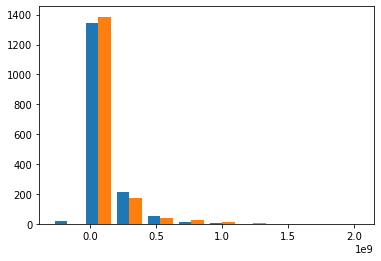

In [79]:
plt.hist([predicted,y_test]);

## Evaluemos de forma más fina el comportamiento de nuestro modelo

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Los estimadores y las funciones de sklearn vienen con el máximo de argumentos con valores por defecto que suelen ser las mejores opciones si no tenemos algun conocimiento particular el problema. En este caso particular la función <code>estimator.score</code> ya viene con una de las métricas de <code>sklearn.metrics</code>, que es la métrica <code>sklearn.metric.r2_score</code>
</div>


<div class="alert alert-success">
  El <strong>score R2</strong> de una regresión es una de las formas más comunes de entender su poder predictivo. Este <strong>mientras más cerca de 1 este, mejor es</strong>
</div>
<div class="alert alert-success">
Los valores que puede tomar son de -infinito hasta 1. Un score R2 negativo es malo, ya que esto indica que la regresión es peor que si simplemente eligieramos un valor fijo como predicción para todos los puntos, la media. 
</div>

In [80]:
model.score(X_test,y_test)

0.5803597861019066

Bastante bien para un primer modelo!

Un buen score R2 es importante para una regresión. Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades. Un ejemplo es el siguiente:

<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/datasaurus_dozen.png" width="800" style="margin:0 auto;clear:both">
<div class="alert alert-success">
<strong>Siempre visualiza tus resultados</strong>, aunque tengas un buen score de performance.
</div>



In [81]:
residuals = y_test - predicted

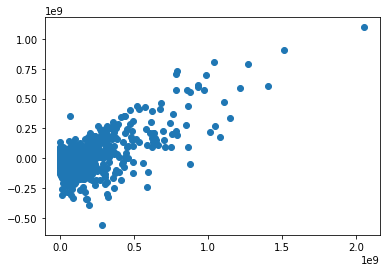

In [82]:
plt.scatter(y_test,residuals)

In [83]:
ap_residuals = np.abs(residuals) / y_test

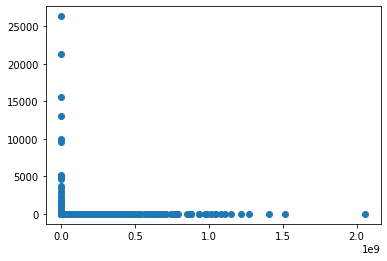

In [84]:
plt.scatter(y_test,ap_residuals)

In [85]:
lap_residuals = np.log(ap_residuals)

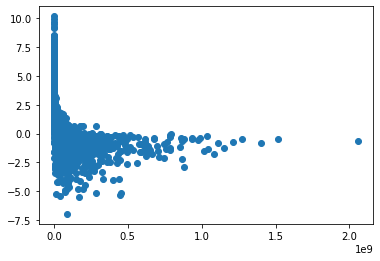

In [86]:
plt.scatter(y_test,lap_residuals)

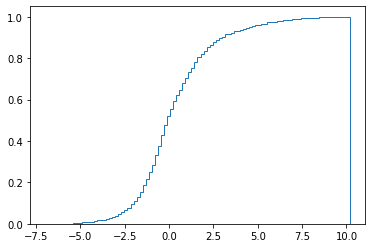

In [87]:
plt.hist(lap_residuals, bins=100, density=True, stacked=True, histtype='step', cumulative=True);

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

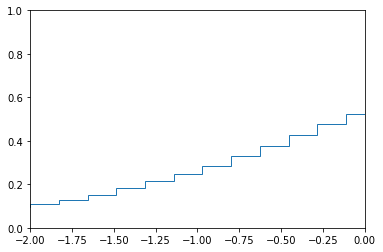

In [88]:
plt.hist(lap_residuals, bins=100, density=True, stacked=True, histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

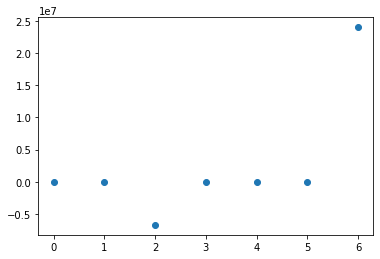

In [89]:
plt.scatter(np.arange(7),model.coef_)

In [90]:
X = pd.read_csv('X.csv')

In [91]:
#X = X.drop('gross',axis=1)

In [92]:
X = X.drop('worldwide_gross',axis=1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [94]:
model = Lasso()
model.fit(X_train,y_train)

Lasso()

In [95]:
model.score(X_test,y_test)

0.5479185084008611

In [96]:
X.columns

Index(['production_budget', 'title_year', 'aspect_ratio', 'duration.1',
       'cast_total_facebook_likes', 'budget', 'imdb_score'],
      dtype='object')

In [97]:
for el in zip(list(X.columns),list(model.coef_)):
    print(el)

('production_budget', 3.0491705657527453)
('title_year', -387647.20306260453)
('aspect_ratio', -8819185.024728285)
('duration.1', -156951.8651708884)
('cast_total_facebook_likes', 282.06752513408327)
('budget', -0.00978429855107824)
('imdb_score', 26979056.06038905)


<div class="alert alert-success">
  Mejorar la performance de nuestros modelos no solo pasa por optimizar sus parametros. 
  <br>Una de las partes clave, y según algunos expertos la más importante, es la de **diseñar la representación en la que se entregan los datos a los modelos** para que estos los procesen. <br>
  Esto equivale, en palabras más simples, en definir de forma inteligente las features (columnas) de nuestras tablas de datos.
            </div>

**Ejemplo de feature engineering:**

*El problema*:
    
Supongamos que estamos tratando de resolver el problema siguiente.

- Tenemos un problema de reconocer si ciertos datos con una sola feature son de una clase 1 o de una clase 2 (por ejemplo "el producto esta deficiente" o "el producto esta funcional").
- Por lo tanto estamos resolviendo una **clasificación**.
- Para esta clasificación decidimos tomar un SVM, que es un modelo poderoso que funciona buscando la "mejor" recta que separa los puntos de cada clase.

<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/classif_1_feature.png">

*Como podemos ver no existe un separador óptimo. Debemos para resolver el problema buscar un modelo aún más poderoso? No necesariamente.*

**Agregemos una nueva feature: $$X[columna_2] = X[columna_1]^2$$**

<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/classif_2_features.png">

*Claramente con esta nueva feature vemos que existe una recta que separa los espacios de puntos. <br>
Esta recta tendra un score ampliamente mejor que cualquier solucion al primer problema.*

## Principios de diseño de Features

<div class="alert alert-success">
  Diseñar tus features es un arte más que una ciencia (por lo que en general te recomendamos ganar experiencia leyendo articulos cientificos y viendo soluciones
  <ol>
    <li> <strong>Features Informativas</strong>: Tus features son más utiles mientras más correlación tengan tu variable objetivo.</li>
  <li> <strong>Features Independientes</strong>: Para no tener redudancias tus features deberían ser lo más independientes posible entre ellas.</li>
    <li> <strong>Cantidad de Features controlada</strong>: Nuestra intuición nos falla en dimensiones superiores a 3 (ver video maldicion de la dimensionalidad). En la mayoría de los casos aumentar la cantidad de features afecta negativamente la performance si no contamos con una gran cantidad de datos. Por ultimo pocas features aseguran una mejor interpretabilidad de los modelos</li>
  </ol>
</div>

**Ejemplo de Feature informativa y Feature no informativa**

<span style="color:green"> Predecir el **precio de una casa** en **función de sus metros cuadrados**.</span> <br>

<span style="color:red"> Predecir el **precio de una casa** en **función de la temperatura del mar**.</span>


Es importante entender la correlación entre la feature y la variable objetivo. Más sobre esto en los siguientes videos.

**Visualizar interdepencia entre variables**

In [98]:
X = pd.read_csv('X.csv').drop('worldwide_gross',axis=1)

<AxesSubplot:>

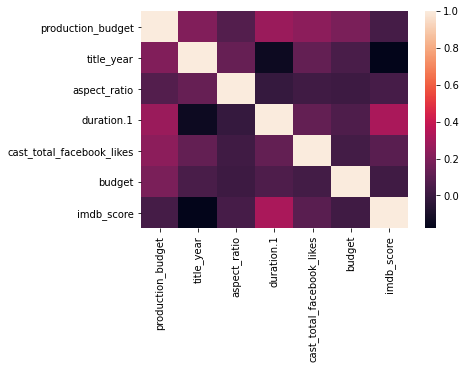

In [99]:
sns.heatmap(X.corr())

## La maldición de la dimensión

---

*Datasaurus Dozen y Anscombe's quartet:* 

Utilidad de la capacidad de entender los datos en 1, 2 y 3 dimensiones del ojo humano.

*Maldición de la dimensionalidad*:

En **dimensión superior o igual a 4**, nuestra capacidad de entender los datos se pierde, **y aún peor fenomenos extraños/contraproducentes ocurren**

---



**Ejemplo 1**

Que largo debe tener cada arista de un hypercubo de dimension p que capture 10% del volumen de un hypercubo de volumen 1 que lo contiene?

<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/cube.png">

$$ V_{hypercubo} = a^p\ y\ si\ V_{hypercubo} = 0.1 \implies a = 0.1^{1/p}$$
$$$$

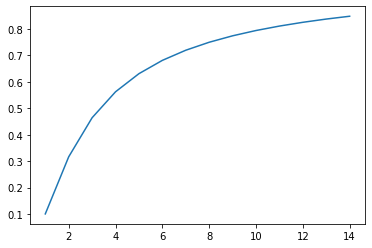

In [100]:
x = np.arange(1,15)
y = np.power(0.1,1/x)
plt.plot(x,y)

**En dimensión 10**: Necesitamos un hypercubo que cubra 80% de cada una de las aristas para solamente obtener 10% del volumen!

<div class="alert alert-success">
  En alta dimensión es muy poco probable que tus ejemplos cubran todo el espacio de forma densa. <br>
  Por ende en **alta dimensión necesitas una cantidad de datos que crece exponencialmente para poder entrenar tus modelos**. <br>
  Te recomendamos tener cuidado al aumentar la dimensión de tus datos, no esta prohibido, pero hacerlo de forma exagerada te puede llevar hacia estos problemas.
</div>

In [101]:
import warnings
warnings.simplefilter("ignore")

## Feedback de tus modelos

<div class="alert alert-success">
  Ciertos modelos como la regresión o los arboles se dicen **"interpretables"**. Esto quiere decir que de los resultados de los modelos podemos sacar conclusiones o **"insights"**.
</div>

En particular la regresión Lasso es interpretable: 

- mientras más grande el coeficiente para una feature, más relevante es esta para la regresión.
- la regresión Lasso trata de seleccionar un pequeño número de features relevantes.

In [102]:
X = pd.read_csv('X.csv')

y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [103]:
model = Lasso()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [105]:
len(X_train)/len(X)

0.75

In [106]:
model.fit(X_train,y_train)

Lasso()

In [107]:
model.score(X_test,y_test)

0.4650853745278736

In [108]:
model.coef_

array([ 3.24175525e+00, -4.29166017e+04, -5.89793761e+06,  2.83927634e+04,
        1.13788581e+02, -7.43470773e-02,  2.63136954e+07])

In [109]:
var = np.floor(np.log10(np.abs(model.coef_)))

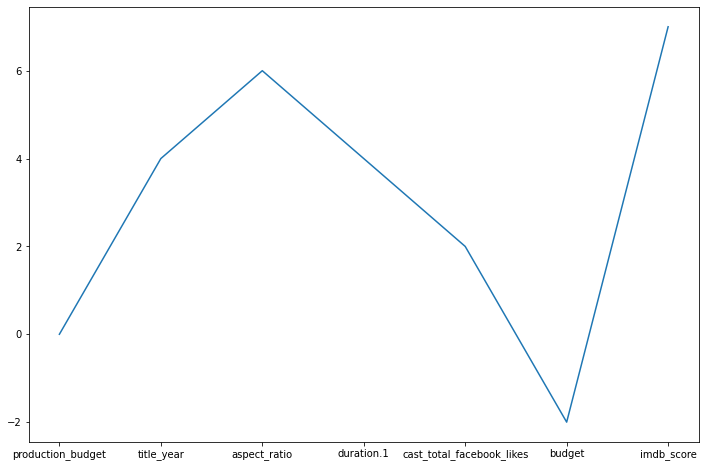

In [110]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));

Esto nos guía a guardar únicamente:

- production_budget
- title_year
- duration
- cast_total_facebook_likes
- imdb_score

## Correlación entre variables

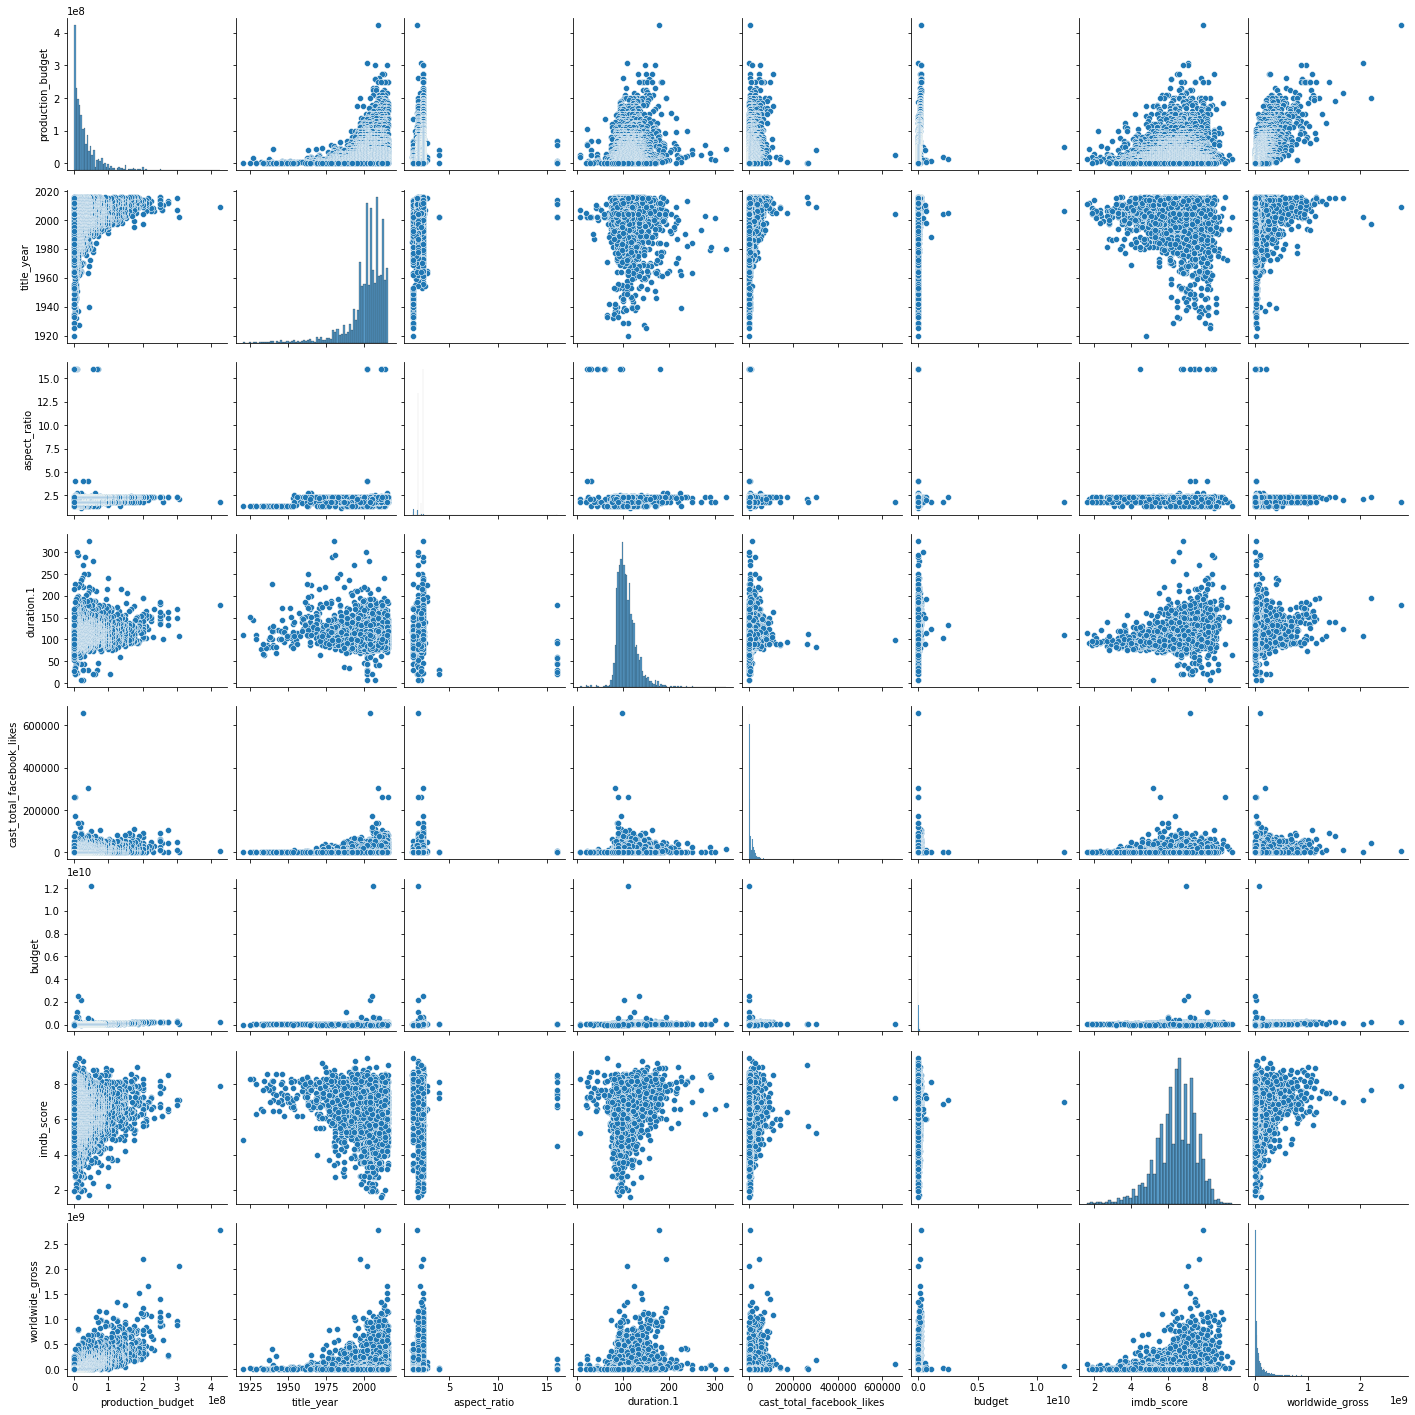

In [111]:
Z = pd.concat([X,y],axis=1)
sns.pairplot(Z)

In [112]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
Z2 = pd.concat([X,clase],axis=1)

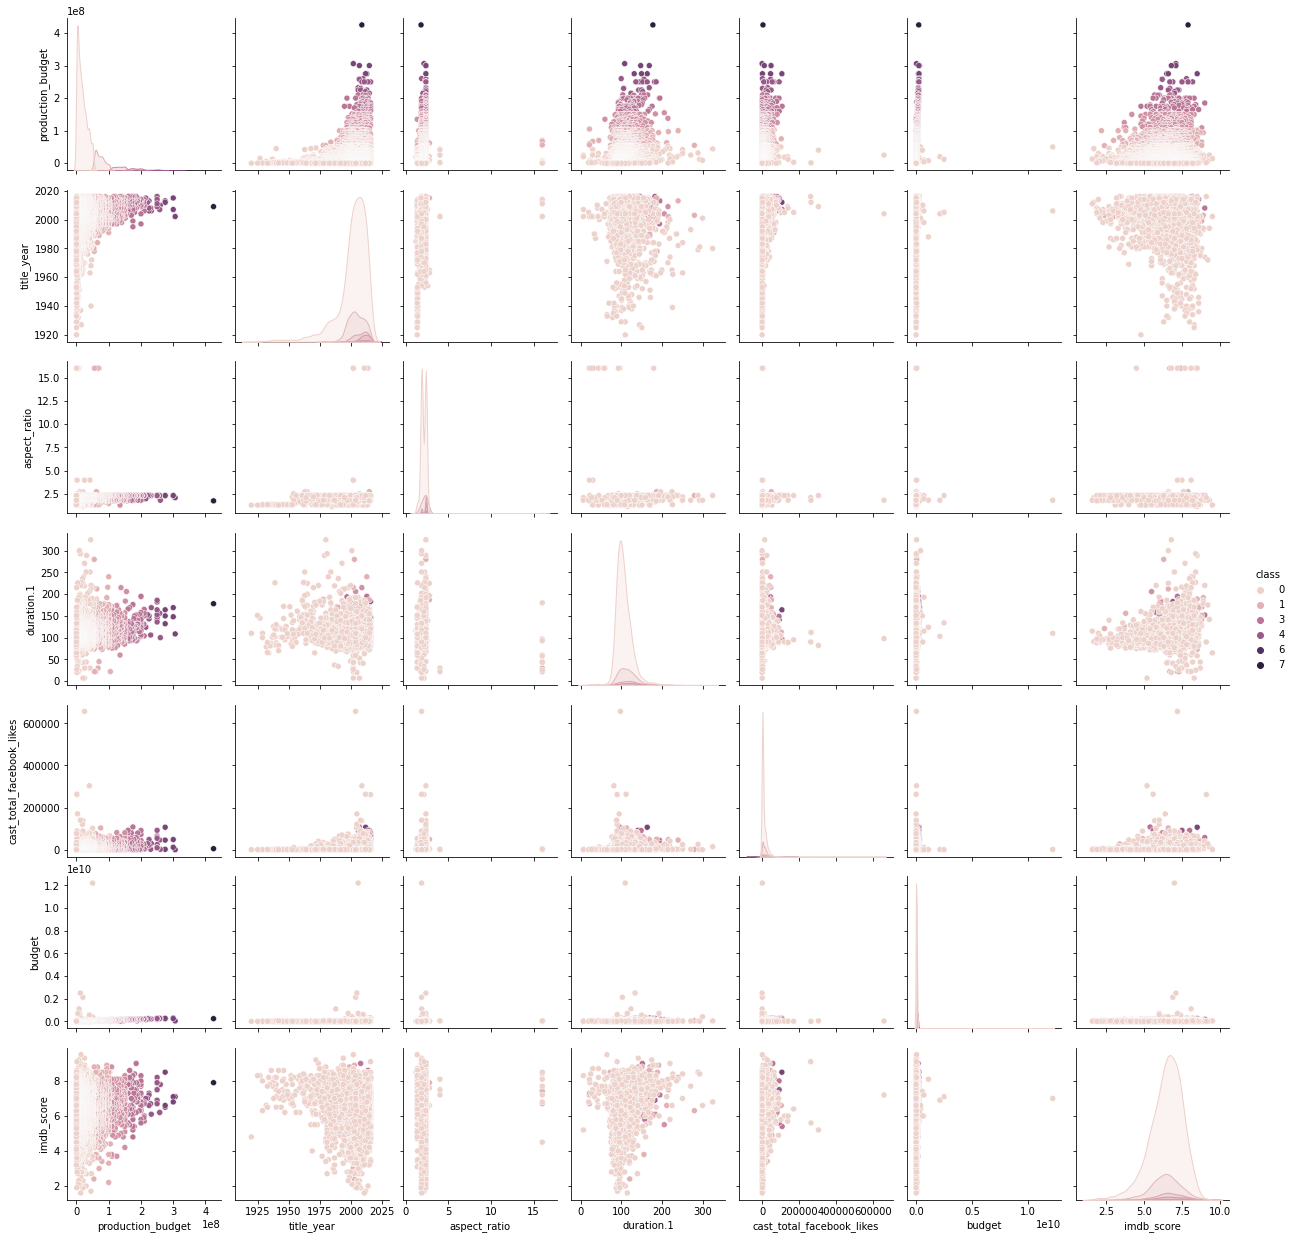

In [113]:
sns.pairplot(Z2,hue='class')

<AxesSubplot:>

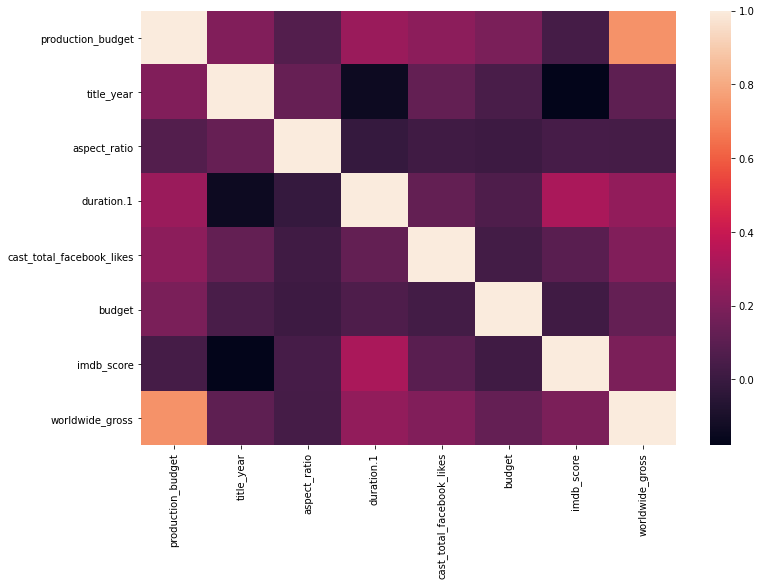

In [114]:
Z3 = pd.concat([X,y],axis=1)
sns.heatmap(Z3.corr())

De esto concluimos, sin sorpresa, que son muy importantes:

- production_budget
- imdb_score

## Metodos de selección automatica de features

<div class="alert alert-info">
  Sklearn posee una serie de métodos para seleccionar las mejores features. Estos métodos los puedes encontrar en sklearn.feature_selection
</div>

In [115]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7fd066be3c80>)

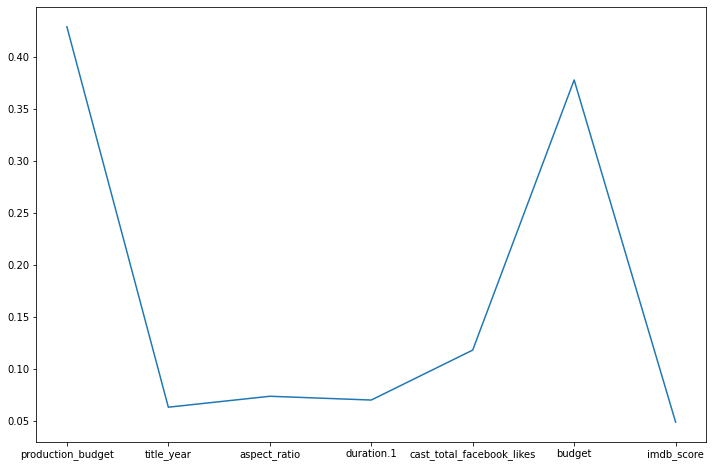

In [116]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));

Del analisis univariante obtenemos que las mejores features son:

- production_budget
- cast_total_facebook_likes
- budget

**Guardaremos las 5 features entregadas por la interpretación de nuestra regresión Lasso**

In [117]:
X2 = X[['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']]

## Veamos los resultados del modelo con estas features

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [119]:
cols2 = ['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [120]:
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

Lasso()

In [121]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.5517396880169188
0.5694318122510889
0.5691509562803523


## Escalamiento de los datos

<div class="alert alert-success">
  Diversos algoritmos son sensibles a la escala en la que viene cada feature. **Re-escalarlos** puede traer significativas mejoras de rendimiento.
</div>

Existen distintas estrategias de escalamiento de tus features, pero **la más común es la estandarización** donde convertimos la variable para que la distribución de esta siga una distribución que es Gaussiana de media 0 y de desviación estandar 1.

In [122]:
X = pd.read_csv('X.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [124]:
scaler.mean_

array([3.38086645e+07, 2.00235311e+03, 2.12660016e+00, 1.08692208e+02,
       1.05073080e+04, 3.76761869e+07, 6.46692658e+00])

In [125]:
scaler.scale_

array([4.15124597e+07, 1.17101194e+01, 7.19895096e-01, 2.33021501e+01,
       1.99602224e+04, 6.23702679e+07, 1.06719850e+00])

In [126]:
X.values

array([[4.25000000e+08, 2.00900000e+03, 1.78000000e+00, ...,
        4.83400000e+03, 2.37000000e+08, 7.90000000e+00],
       [3.06000000e+08, 2.00213073e+03, 2.12697615e+00, ...,
        1.43000000e+02, 4.04553863e+07, 7.10000000e+00],
       [3.00000000e+08, 2.00700000e+03, 2.35000000e+00, ...,
        4.83500000e+04, 3.00000000e+08, 7.10000000e+00],
       ...,
       [7.00000000e+03, 2.00500000e+03, 2.12697615e+00, ...,
        9.30000000e+01, 3.25000000e+03, 7.80000000e+00],
       [3.96700000e+03, 2.01200000e+03, 2.35000000e+00, ...,
        2.38600000e+03, 4.04553863e+07, 6.30000000e+00],
       [1.10000000e+03, 2.00400000e+03, 1.85000000e+00, ...,
        1.63000000e+02, 1.10000000e+03, 6.60000000e+00]])

In [127]:
scaler.transform(X_train)

array([[ 0.14914403,  0.56761922, -0.38422287, ...,  0.71455577,
         0.03725835,  1.24913352],
       [ 0.87181862, -0.45713549,  0.31032277, ...,  0.08610585,
         0.51825676,  0.49950728],
       [-0.21219327,  0.05524187,  0.31032277, ..., -0.37425976,
        -0.18720758, -1.37455831],
       ...,
       [-0.21219327,  0.22603432,  0.31032277, ..., -0.34931014,
         0.04455968, -0.90604191],
       [-0.71806549,  0.65301545,  0.31032277, ..., -0.47440894,
        -0.59365124,  0.03099088],
       [-0.73011006, -0.37173926,  0.31032277, ..., -0.31409009,
        -0.54795639,  0.96802368]])

In [128]:
X_train_scaled, X_test_scaled = (scaler.transform(X_train), scaler.transform(X_test))

In [129]:
model = Lasso()
model_scaled = Lasso()

model.fit(X_train,y_train)
model_scaled.fit(X_train_scaled,y_train)

Lasso()

In [130]:
print(model.score(X_test,y_test))
print(model_scaled.score(X_test_scaled,y_test))

0.5279353375071498
0.527935366413739


<div class="alert alert-success">
  Los modelos de regresión no se ven afectados por el escalamiento de las features. Los de clasificación sí. 
</div>

## Simplificar las transformaciones con pipelines

<div class="alert alert-info">
  Para hacer tu código más reproducible, y para evitar tener que aplicar multiples veces una misma transformación te recomendamos utilizar <code> sklearn.pipeline.make_pipeline </code> que permite encadenar transformaciones a tus modelos.
</div>

In [131]:
from sklearn.pipeline import make_pipeline

model_scaled = make_pipeline(StandardScaler(),
                            Lasso())

model_scaled.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [132]:
print(model_scaled.score(X_test,y_test))

0.527935366413739


## Crear nuevas features de forma automática

In [133]:
A = np.arange(6).reshape(3, 2)
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [134]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(2)
transformer.fit_transform(A)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

``PolynomialFeatures`` transforma una matriz $(A1,A2)$ a $(1,A1,A2,A1^2,A1\cdot A2,A2^2)$

In [135]:
X.shape

(4104, 7)

In [136]:
transformer = PolynomialFeatures(2)
transformer.fit_transform(X).shape

(4104, 36)

In [137]:
model_poly = make_pipeline(PolynomialFeatures(2),
                          Lasso())
model_poly.fit(X_train,y_train)
model_poly.score(X_test,y_test)

-2.1704617330568015

In [138]:
model = Lasso()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5279353375071498

## Crear features categóricas

<div class="alert alert-success">
  En terminos de Machine Learning a las features que pueden tomar un número finito de valores se les llama categóricas. Ejemplos para esto són: género, páis, grado académico, etc.
</div>

Un mapeo del tipo $\{Perú, Chile, Colombia, Venezuela\} \rightarrow \{1, 2, 3, 4\}$ tiene el problema de asignarle un ordén a los valores posibles de la categoría. Este orden impacta de distintas maneras los algoritmos de Machine Learning, por ejemplo aquellos que dependen de la topología de $R^n$ y de la función de distancia entre puntos en este espacio, considerarán que ciertas categorías se encuentran más cercanas unas de otras, siendo que esto es generado puramente artificialmente por el encoding, y no por las datos per se. 

Para no introducir información falsa o erronéa en nuestro modelos existen formas más inteligentes de encodear nuestros datos.

_**Encoding one-hot**_

Este encoding consiste en asignarle una columna a cada categoría y rellenarla con 0 y 1 de la forma siguiente:

In [139]:
d = pd.DataFrame([['Chile','Colombia','Colombia','Venezuela'],['hombre','mujer','hombre','mujer']])
d = d.T
d.columns = pd.Index(['pais','genero'])
d

,pais,genero
0,Chile,hombre
1,Colombia,mujer
2,Colombia,hombre
3,Venezuela,mujer


In [140]:
pd.get_dummies(d)

,pais_Chile,pais_Colombia,pais_Venezuela,genero_hombre,genero_mujer
0,1,0,0,1,0
1,0,1,0,0,1
2,0,1,0,1,0
3,0,0,1,0,1


Sklearn también ofrece un objeto OneHotEncoder pero es un poco más díficil de utilizar, así que por criterios pedagogicos hemos elegido ``pd.get_dummies``. Sin embargo el objeto de sklearn tiene la ventaja de ser pipeable, por lo que es bueno considerarlo para ciertos casos de uso.

Cuantas columnas generaríamos con un one-hot encoding de nuestras features categóricas?

In [141]:
movies_obj = pd.read_csv('https://raw.githubusercontent.com/cris-her/datasets-platzi-course/master/intermediate_results/movies_obj.csv')

In [142]:
movies_obj.apply(pd.Series.nunique).sort_values()

color                2
content_rating      18
language            47
country             65
genres             914
actor_1_name      2097
director_name     2398
actor_2_name      3032
actor_3_name      3521
plot_keywords     4760
movie_title       4917
dtype: int64

Las features más informativas son las del casting. Si embargo haciendo un one-hot encoding de estas estaríamos aumentando la dimensión por 2000 y algo!!

## Encoding Binario

Esta técnica no es canónica por lo que tendremos que buscarla en otra librería. Sin embargo el autor tuvo la buena idea de hacer su API compatible con la de sklearn, así que no tendremos ninguna dificultad en usarla.

$$ Categoria \rightarrow Numero \rightarrow Binario \rightarrow Columnas $$

In [143]:
!pip install category_encoders

In [144]:
categoricals = pd.read_csv('https://raw.githubusercontent.com/cris-her/datasets-platzi-course/master/intermediate_results/categoricals.csv').set_index('Unnamed: 0')

In [145]:
categoricals.head(2)

,actor_1_name,director_name
Unnamed: 0,,
0,CCH Pounder,James Cameron
1,Doug Walker,Doug Walker


In [146]:
categoricals = categoricals.reset_index(drop=True).fillna(0)

In [147]:
X_binenc = pd.concat([X,categoricals],axis=1)

In [148]:
X_binenc.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,actor_1_name,director_name
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,CCH Pounder,James Cameron
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,Doug Walker,Doug Walker
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,Johnny Depp,Gore Verbinski
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,Christoph Waltz,Sam Mendes
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,Tom Hardy,Christopher Nolan


In [149]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['actor_1_name','director_name'])

In [150]:
encoder.fit_transform(X_binenc).shape

(4104, 31)

In [151]:
X_binenc = encoder.fit_transform(X_binenc)

In [152]:
y = pd.read_csv('https://raw.githubusercontent.com/cris-her/datasets-platzi-course/master/intermediate_results/y.csv').set_index('Unnamed: 0')
Xb_train, Xb_test, y_train, y_test = train_test_split(X_binenc,y)

In [153]:
X_train, X_test = (Xb_train[X.columns],Xb_test[X.columns])

In [154]:
model_binenc = Lasso()
model = Lasso()

In [155]:
model_binenc.fit(Xb_train,y_train)
model.fit(X_train,y_train)

Lasso()

In [156]:
print(model_binenc.score(Xb_test,y_test))
print(model.score(X_test,y_test))

0.5493365242079327
0.5465170959159226


Aumentamos el rendimiento de nuestro algoritmo pero no de forma significativa. Mantengamos entonces la dimensionalidad de nuestro espacio de features baja, y vamos a buscar modelos más complejos.

## Conocimiento experto

<div class="alert alert-success">
  Una grán parte del diseño de las features pasa por un **conocimiento espécifico del dominio en el que se esta trabajando**. <br>
  Por ejemplo para analizar una imagen nuestro cerebro no se concentra en los millones de pixeles de una imagen, pero sólo en algunos relevantes como los de los contornos. Durante un buen tiempo **los sistemas de visión de computadores encodeaban features que traducían este conocimiento experto (contornos).** <br>
  Una de las únicas formas de obtener este conocimiento de forma sistemática es ir a bucear en repositorios de papers de Machine Learning como Arxiv, y estudiar la investigación que se ha hecho sobre el dominio específico.
</div>

## Más datos de calidad

Nada le gana conseguir más datos que sean encodeables en features de calidad.

_**Píramide de Maslow del Machine Learning**_

<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/maslow.png">

Contamos con la base de datos de ganancias de las péliculas el primer fin de semana de exhibición, así como la cantidad de cines en la que fue estrenada.

In [157]:
pd.read_csv('https://raw.githubusercontent.com/cris-her/datasets-platzi-course/master/intermediate_results/X_opening.csv').head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2.783919e+09,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,9.634204e+08,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0
2,300000000.0,8.796209e+08,2015.0,2.35,148.0,11700.0,245000000.0,6.8,70403148.0,3929.0
3,275000000.0,1.084439e+09,2012.0,2.35,164.0,106759.0,250000000.0,8.5,160887295.0,4404.0
4,275000000.0,2.600021e+08,2013.0,2.35,150.0,45757.0,215000000.0,6.5,29210849.0,3904.0


Puedes mejorar considerablemente nuestra predicción?

## Métodos de evaluación 

Por ahora hemos visto que:
    
- Se necesita **separar de forma aleatoria** en datos de entrenamiento y testeo para poder evaluar performance del algoritmo
- Existen diversas **métricas para evaluar rendimiento**, y elegimos la nuestra según las caracteristicas de nuestro problema
- Es útil **apoyar la evaluación con visualizaciones de errores**, como por ejemplo scatterplots de residuales

Sin embargo nuestro método hasta ahora tiene una falla. Este depende de la forma en que fueron elegidos nuestros datos de forma aleatoria:

- Podemos tener suerte y caer en un train set y test set que sea ideal para nuestro modelo.
- Podemos tener pésima performance con esa separación de datos pero no en otros.

** Controlar la aleatoridad en train_test_split**

train_test_split separa cada vez que lo llamamos los datos de forma diferente. Para poder comparar modelos, hacer un código más limpio y compacto y para poder hacer nuestros experimentos reproducibles utilizaremos el parametro *random_state*.

In [158]:
X = pd.read_csv('https://raw.githubusercontent.com/cris-her/datasets-platzi-course/master/intermediate_results/X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [159]:
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=1)

In [160]:
X2_train,X2_test, y2_train,y2_test = train_test_split(X,y, random_state=1)

In [161]:
pd.DataFrame.equals(X_train,X2_train)

True

**Cross Validation**

<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/crossval.png">

In [162]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')
scores

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [163]:
scores.mean()

0.44964021745791766

In [164]:
Lasso().fit(X_train,y_train).score(X_test,y_test)

0.792619029496336

## Selección de modelos

** Overfitting o underfitting?**

Recuerden que para saber si estamos en overfitting o en underfitting necesitamos los scores de entrenamiento y test.

In [165]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [166]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(),X,y,return_train_score=True,cv=5)
results

{'fit_time': array([0.01122952, 0.02790976, 0.02898145, 0.02596688, 0.02412939]),
 'score_time': array([0.00465083, 0.00396061, 0.00362015, 0.00348067, 0.00498652]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [167]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7491178363039036
0.44964021745791766


Tenemos bias por lo que buscaremos modelos más complejos.